In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the payoffs for each player
payoffs_p1 = {
    "C":{'A': {'A': 1, 'R': -3},
    'R': {'A': 0, 'R': 0}},
    "S":{'A': {'A': 2, 'R': -1},
    'R': {'A': 0, 'R': 0}}
}

payoffs_p2 = {
    "C":{'A': {'A': 1, 'R': 0},
    'R': {'A': -3, 'R': 0}},
    "S":{'A': {'A': 2, 'R': 0},
    'R': {'A': -1, 'R': 0}}
}

payoffs_p3 = {
    "C":{'A': {'A': -1, 'R': 1},
    'R': {'A': 1, 'R': 1}},
    "S":{'A': {'A': -2, 'R': 2},
    'R': {'A': 2, 'R': 2}}
}

# Define functions to calculate expected utilities & return action generates the most expected utility
def eu1(q, r):
    eu_dic={}
    for action in ["A","R"]:
        eu = r*(q*payoffs_p1["C"][action]["A"]+(1-q)*payoffs_p1["C"][action]["R"]) + (1-r)*(q*payoffs_p1["S"][action]["A"]+(1-q)*payoffs_p1["S"][action]["R"])
        eu_dic[action]=eu
    
    return max(eu_dic,key=eu_dic.get)

def eu2(p, r):
    eu_dic={}
    for action in ["A","R"]:
        eu = r*(p*payoffs_p2["C"]["A"][action]+(1-p)*payoffs_p2["C"]["R"][action]) + (1-r)*(p*payoffs_p2["S"]["A"][action]+(1-p)*payoffs_p2["S"]["R"][action])
        eu_dic[action]=eu
    
    return max(eu_dic,key=eu_dic.get)

def eu3(p, q):
    eu_dic={}
    for action in ["C","S"]:
        eu = p*(q*payoffs_p3[action]["A"]["A"]+(1-q)*payoffs_p3[action]["A"]["R"]) + (1-p)*(q*payoffs_p3[action]["R"]["A"]+(1-q)*payoffs_p3[action]["R"]["R"])
        eu_dic[action]=eu
    
    return max(eu_dic,key=eu_dic.get)

# Set p, q, r values
p_values = np.arange(0.01, 1.01, 0.01)
q_values = np.arange(0.01, 1.01, 0.01)
r_values = np.arange(0.01, 1.01, 0.01)

# Initialize best response for each player
p1_best_response=[]
p2_best_response=[]
p3_best_response=[]

# Calculate best response for each player
for q in q_values:
    for r in r_values:
        p1_best_response.append(1 if eu1(q,r)=="A" else 0)
        
for p in p_values:
    for r in r_values:
        p2_best_response.append(1 if eu2(p,r)=="A" else 0)

for p in p_values:
    for q in q_values:
        p3_best_response.append(1 if eu3(p,q)=="C" else 0)


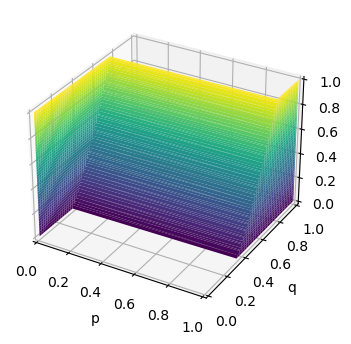

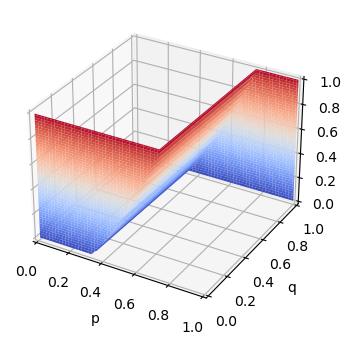

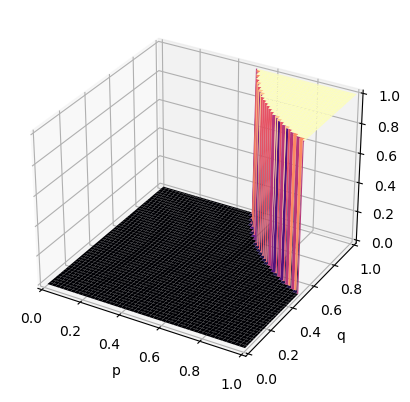

In [7]:
# Create a figure for P1
fig1 = plt.figure(figsize=(6, 4))

# Define a 3d axis
ax1 = fig1.add_subplot(111, projection='3d')

# Assign calculated values
y=q_values
z=r_values
x=np.array(p1_best_response).reshape(len(y), len(z))
z, y = np.meshgrid(z, y)

# Draw surface diagram
ax1.plot_surface(x, y, z, cmap='viridis', alpha=1)

# Create a figure for P2
fig2 = plt.figure(figsize=(6, 4))

# Define a 3d axis
ax2 = fig2.add_subplot(111, projection='3d')

# Assign calculated values
x=p_values
z=r_values
y=np.array(p2_best_response).reshape(len(x), len(z))
z, x = np.meshgrid(z, x)

# Draw surface diagram
ax2.plot_surface(x, y, z, cmap='coolwarm', alpha=1)

# Create a figure for P3
fig3 = plt.figure(figsize=(6, 4))

# Define a 3d axis
ax3 = fig3.add_subplot(111, projection='3d')

# Assign calculated values
x=p_values
y=q_values
z=np.array(p3_best_response).reshape(len(x), len(y))
y, x = np.meshgrid(y, x)

# Draw surface diagram
ax3.plot_surface(x, y, z, cmap='magma', alpha=1)


# Set axis and labels
ax1.set_xlabel('p')
ax1.set_ylabel('q')
ax1.set_zlabel('r')

ax1.axes.set_xlim3d(0, 1)
ax1.axes.set_ylim3d(0, 1)
ax1.axes.set_zlim3d(0, 1)

ax2.set_xlabel('p')
ax2.set_ylabel('q')
ax2.set_zlabel('r')

ax2.axes.set_xlim3d(0, 1)
ax2.axes.set_ylim3d(0, 1)
ax2.axes.set_zlim3d(0, 1)

ax3.set_xlabel('p')
ax3.set_ylabel('q')
ax3.set_zlabel('r')

ax3.axes.set_xlim3d(0, 1)
ax3.axes.set_ylim3d(0, 1)
ax3.axes.set_zlim3d(0, 1)

plt.tight_layout()

# Show diagrams
plt.show()

# Save diagrams
fig1.savefig("P1.png")
fig2.savefig("P2.png")
fig3.savefig("P3.png")